**Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Data**

* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.

**Step 1 Importing Library** 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [136]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('train.csv')

**Step 2 Data Inspection**

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.shape

(8523, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Step 3 Data Cleaning**

### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [18]:
df['Item_Weight'].isnull().sum()

1463

<AxesSubplot:xlabel='Item_Weight'>

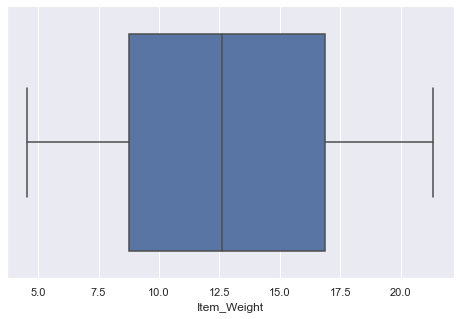

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df)

### The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [20]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
#Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.
impute_size=SimpleImputer(strategy="most_frequent") 
df['Outlet_Size']=impute_size.fit_transform(df[['Outlet_Size']]) 

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Step 4 Explotaory Data Analysis

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### We see there are some irregularities in the column and it is needed to fix them!

In [24]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [25]:
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


# Univariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

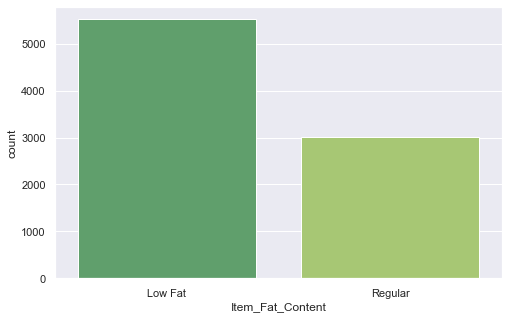

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='summer')

 The Items bought are more of Low Fat.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

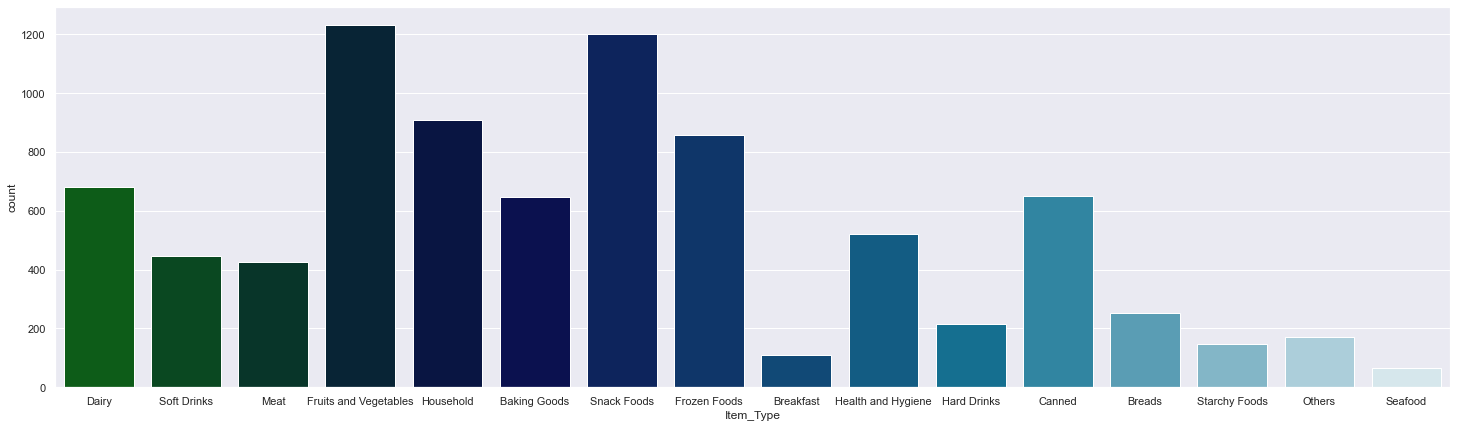

In [28]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='ocean')

## **Observations**:
    
* Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
* Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

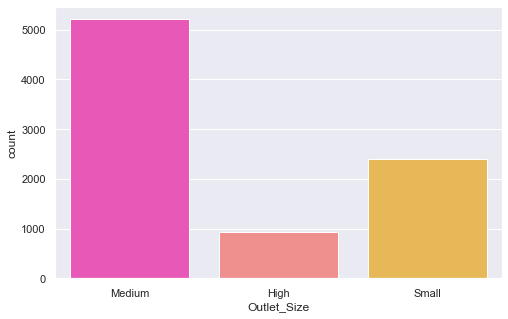

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='spring')

The Outlets are more of Medium Size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

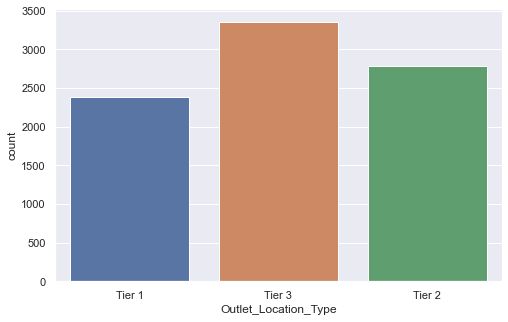

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df)

The maximum number of outlets are in Tier 3 cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

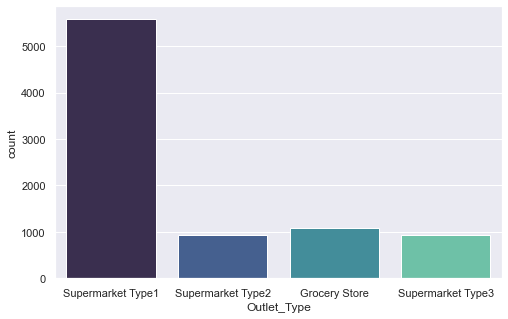

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='mako')

The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

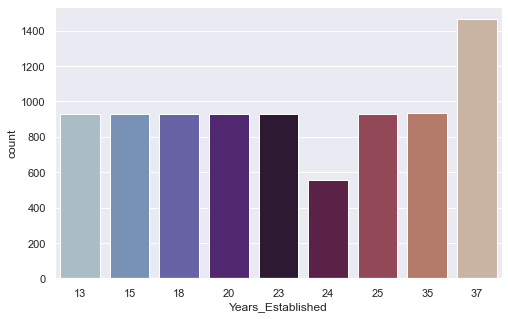

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=df,palette='twilight')

The Outlets are more of established and running from 37 years.

# Bivariet Analysis

**Let's find out which Items are most valuable!**

The Most Valuable Items are the Items which genrate most profitable for a Store.


In [33]:
Top_Item_Type = df.groupby(["Item_Type"]).sum().sort_values("Item_Outlet_Sales", ascending=False).head(10) # Sort the Item_Type as per the Item_Outlet_Sales
Top_Item_Type = Top_Item_Type[["Item_Outlet_Sales"]].round(2) # Round off the Item_Outlet_Sales Value up to 2 decimal places
Top_Item_Type.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Item_Type into dataframe

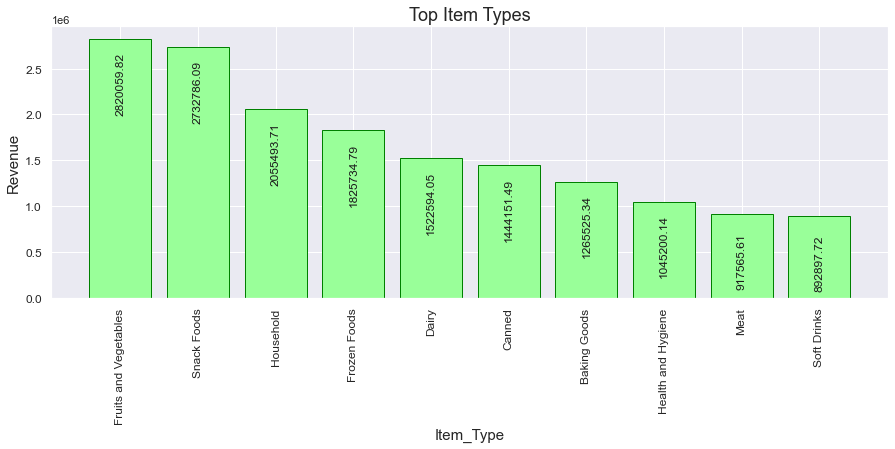

In [34]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Top Item Types", fontsize=18) 
plt.bar(Top_Item_Type["Item_Type"], Top_Item_Type["Item_Outlet_Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Item_Type",fontsize=15) # x axis shows the Item_Type
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_Item_Type["Item_Outlet_Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-800000,str(v), fontsize=12,rotation=90,color='k', ha='center');

**Let's find out which Oulet_Locations_Type generated the highest revenue!**

Here are the Oulet_Locations_Type which generated the highest revenue

In [35]:
Oulet_Locations_Type = df.groupby(["Outlet_Location_Type"]).sum().sort_values("Item_Outlet_Sales", ascending=False) # Sort the Item_Type as per the Item_Outlet_Sales
Oulet_Locations_Type = Oulet_Locations_Type[["Item_Outlet_Sales"]] # keep only the sales column in the dataframe
total_revenue_Type = Oulet_Locations_Type["Item_Outlet_Sales"].sum() # To find the total revenue generated as per category
total_revenue_Type = str(int(total_revenue_Type)) # Convert the total_revenue_category from float to int and then to string
#total_revenue_Type = '$' + total_revenue_category # Adding '$' sign before the Value
Oulet_Locations_Type.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

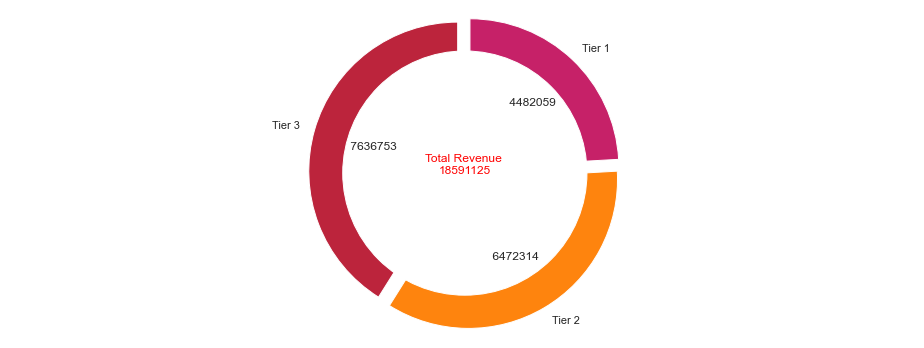

In [36]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Oulet_Locations_Type["Item_Outlet_Sales"], colors = colors, labels=Oulet_Locations_Type["Outlet_Location_Type"], autopct= autopct_format(Oulet_Locations_Type["Item_Outlet_Sales"]), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_Type),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

**We can see that Outlet_Location_Type - Tier 3 generated the highest revenue of about** - 7636753!

**The Total Revenue generated by all the Outlet_Location_Type** - 18591125!

In [37]:
fat_content = df.groupby(["Item_Fat_Content"]).sum().sort_values("Item_Outlet_Sales", ascending=False) # Sort the Fat_Content as per the Item_Outlet_Sales
fat_content = fat_content[["Item_Outlet_Sales"]].round(2) # Round off the Item_Outlet_Sales Value up to 2 decimal places
fat_content.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Fat_Content into dataframe

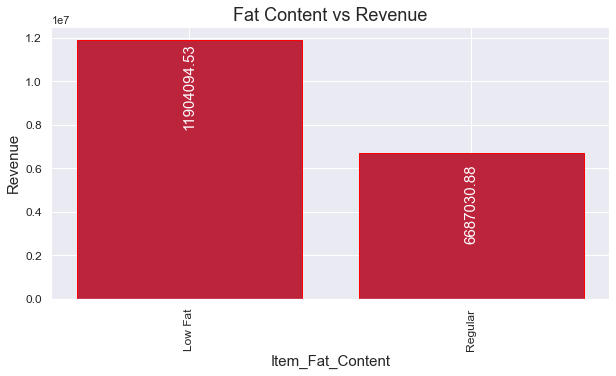

In [38]:
plt.figure(figsize = (10,5)) # width and height of figure is defined in inches
plt.title("Fat Content vs Revenue", fontsize=18) 
plt.bar(fat_content["Item_Fat_Content"], fat_content["Item_Outlet_Sales"],color= '#BC243C',edgecolor='red', linewidth = 1)
plt.xlabel("Item_Fat_Content",fontsize=15) # x axis shows the Item_Type
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in fat_content["Item_Outlet_Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-4000000,str(v), fontsize=15,rotation=90,color='w', ha='center');

**We can see that Low fat content item  generated the highest revenue of about** - 11904094!

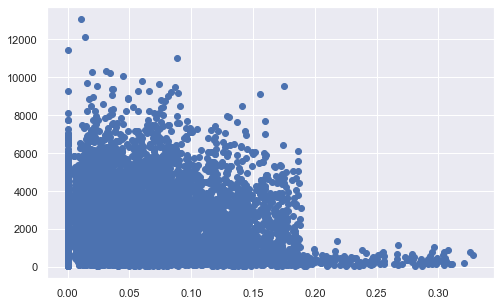

In [39]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

In [40]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

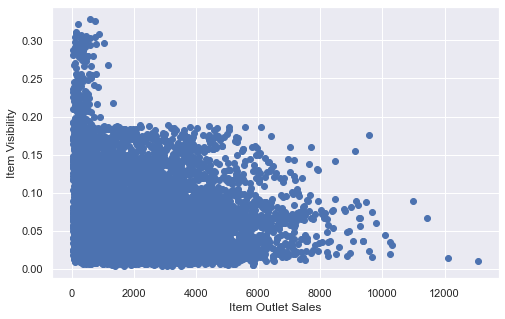

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

Text(0, 0.5, 'Item Outlet Sales')

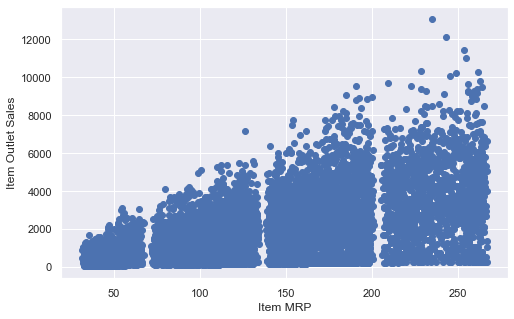

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Items MRP ranging from 200-250 dollars is having high Sales.

In [43]:
Outlet_Size = df.groupby(["Outlet_Size"]).sum().sort_values("Item_Outlet_Sales", ascending=False) # Sort the Item_Type as per the Item_Outlet_Sales
Outlet_Size = Outlet_Size[["Item_Outlet_Sales"]] # keep only the sales column in the dataframe
total_revenue_Type = Outlet_Size["Item_Outlet_Sales"].sum() # To find the total revenue generated as per category
total_revenue_Type = str(int(total_revenue_Type)) # Convert the total_revenue_category from float to int and then to string
#total_revenue_Type = '$' + total_revenue_category # Adding '$' sign before the Value
Outlet_Size.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

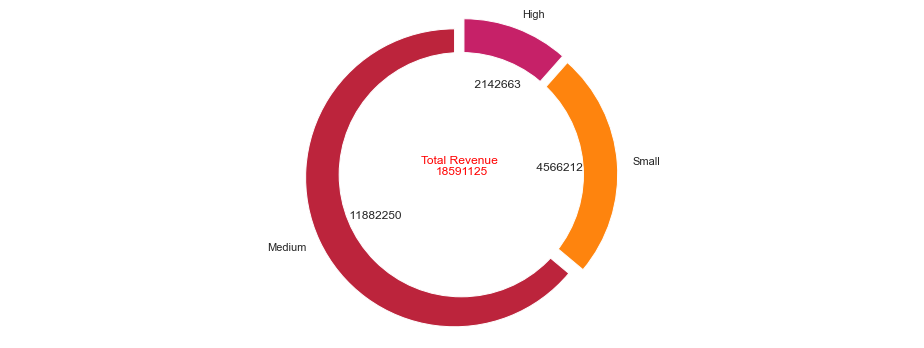

In [44]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Outlet_Size["Item_Outlet_Sales"], colors = colors, labels=Outlet_Size["Outlet_Size"], autopct= autopct_format(Outlet_Size["Item_Outlet_Sales"]), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_Type),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

**We can see that Outlet Size - Medium generated the highest revenue of about** - 11882250!

**The Total Revenue generated by all the Outlet_Size** - 18591125!

In [45]:
Establish_year = df.groupby(["Years_Established"]).sum().sort_values("Item_Outlet_Sales", ascending=False) # Sort the Fat_Content as per the Item_Outlet_Sales
Establish_year = Establish_year[["Item_Outlet_Sales"]].round(2) # Round off the Item_Outlet_Sales Value up to 2 decimal places
Establish_year.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Fat_Content into dataframe

In [46]:
Establish_year

,Years_Established,Item_Outlet_Sales
0,37,3633620.14
1,18,2268122.94
2,23,2183969.81
3,15,2167465.29
4,35,2142663.58
5,25,2118395.17
6,20,2036725.48
7,13,1851822.83
8,24,188340.17


<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

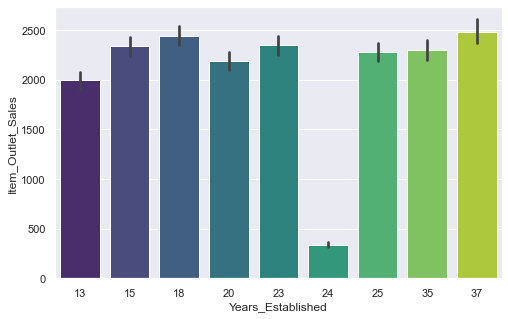

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=df,palette='viridis')

## Observations:

* It is quiet evident that Outlets established 37 years before is having good Sales margin.
* We also have a outlet which was established before 24 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

# Multivariet Analysis

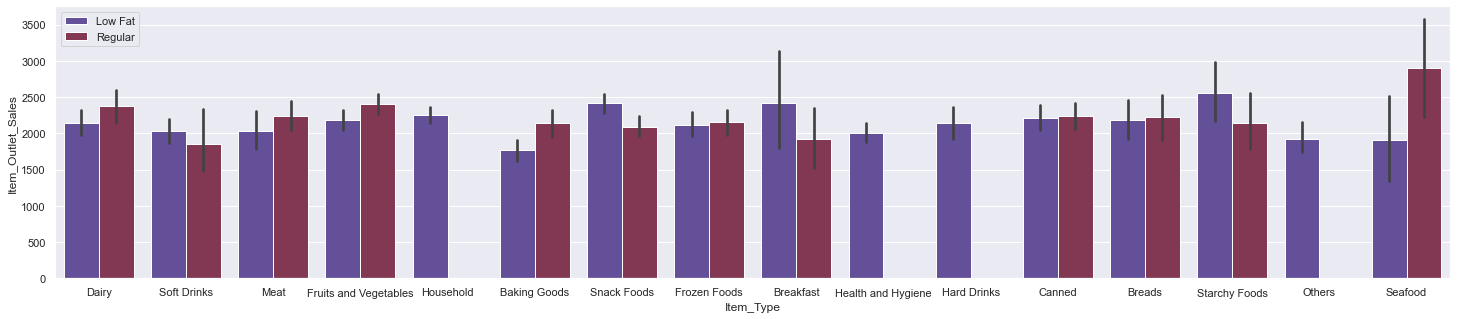

In [48]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='twilight')
plt.legend()

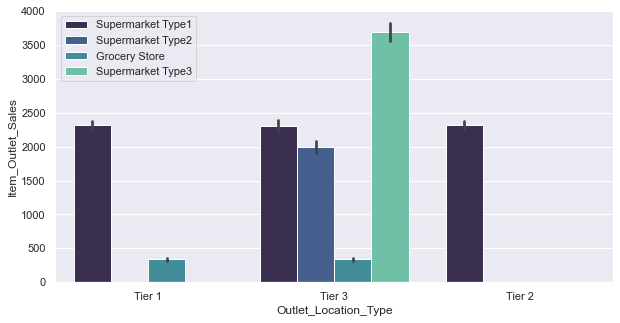

In [49]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='mako')
plt.legend()

The Tier-3 location type has all types of Outlet type and has high sales margin.

# Step 5. Feature Engineering

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [51]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

<AxesSubplot:>

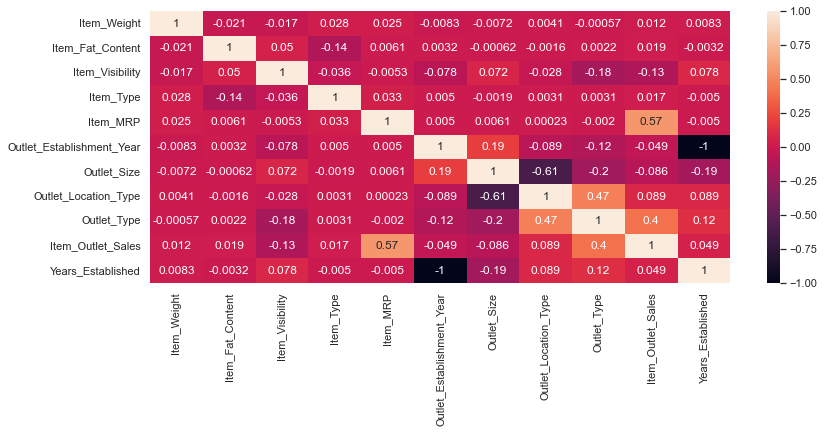

In [52]:
sns.heatmap(df.corr(),annot=True)

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,23
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,13
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,23
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,24
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,35


In [54]:
#some columns need to be drop coz they does not helping with analysis
df = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [125]:
X = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

# Step 6. Building Model

In [128]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [129]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.4946245671867816

In [120]:
rescaledX_train,rescaledX_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.2,random_state=22)
LR = LinearRegression(normalize=True)
LR.fit(rescaledX_train,y_train)
y_pred = LR.predict(rescaledX_test)
coef2 = pd.Series(LR.coef_).sort_values()

In [121]:
R2 = r2_score(y_test,y_pred)
R2

0.4946245671867817

In [122]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

<AxesSubplot:>

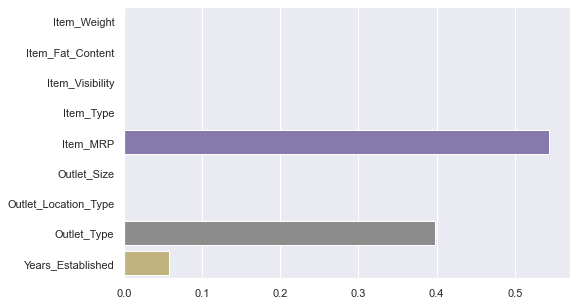

In [63]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [64]:
R2 = r2_score(y_test,y_pred)
R2

0.5701827156302357

In [98]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [99]:
R2 = r2_score(y_test,y_pred)
R2

0.18563098313485826

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
XGB = GradientBoostingRegressor()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

In [133]:
R2 = r2_score(y_test,y_pred)
R2

0.571397663307246

<AxesSubplot:>

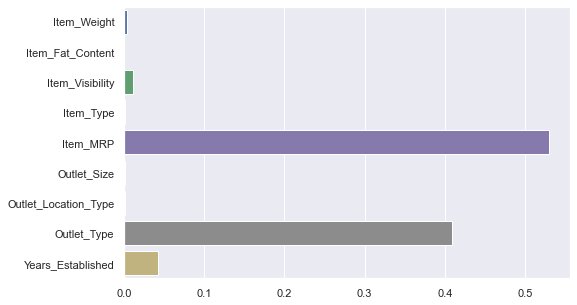

In [135]:
plt.figure(figsize=(8,5))
sns.barplot(XGB.feature_importances_,features)

In [65]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [66]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


In [67]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.53
0.52
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


In [100]:
cross_val(svr,SVR(),X,y,5)

SVR() Scores:
0.18
0.2
0.19
0.19
0.18
Average SVR() score: 0.19


In [134]:
cross_val(XGB,GradientBoostingRegressor(),X,y,5)

GradientBoostingRegressor() Scores:
0.61
0.58
0.57
0.6
0.6
Average GradientBoostingRegressor() score: 0.59


**GradientBoostingRegressor model perform the best**

### Conclusion
* Item_MRP clearly maximises the Outlet sales.
* Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
* Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.